In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import healpy as hp
from astropy import coordinates
from astropy import units as u
from scipy.ndimage.filters import gaussian_filter

In [3]:
d2r = np.pi / 180.

In [4]:
bank = 'A'
session = '5'
dataf = np.load('/home/mabitbol/GBT-S140/datamaps/tod'+bank+'_'+session+'.npz')
tmask = dataf['tmask']
ras = dataf['ras'][tmask]
decs = dataf['decs'][tmask]
calibrated = dataf['calibrated'][tmask]

tmask2 = ~np.isnan(calibrated)
ras = ras[tmask2]
decs = decs[tmask2]
calibrated = calibrated[tmask2] 

In [5]:
c = coordinates.SkyCoord(frame='icrs', ra=ras*u.degree, dec=decs*u.degree)
lats = c.galactic.b.deg
lons = c.galactic.l.deg

In [6]:
#x (row, column).  row goes from down to up.  column goes from left to right. 

In [7]:
lonc = 107.2
latc = 5.2
lonra = [lons.min(), lons.max()]
latra = [lats.min(), lats.max()]

In [12]:
import glob 

In [17]:
fmaps = glob.glob('/home/mabitbol/GBT-S140/externaldata/*.fits')
fmaps.sort()

In [18]:
fmaps

['/home/mabitbol/GBT-S140/externaldata/COM_CompMap_AME-commander_0256_R2.00.fits',
 '/home/mabitbol/GBT-S140/externaldata/COM_CompMap_Dust-GNILC-Model-Opacity_2048_R2.00.fits',
 '/home/mabitbol/GBT-S140/externaldata/COM_CompMap_Synchrotron-commander_0256_R2.00.fits',
 '/home/mabitbol/GBT-S140/externaldata/COM_CompMap_SynchrotronPol-commander_0256_R2.00.fits',
 '/home/mabitbol/GBT-S140/externaldata/COM_CompMap_freefree-commander_0256_R2.00.fits',
 '/home/mabitbol/GBT-S140/externaldata/HFI_Mask_PointSrc_2048_R2.00.fits',
 '/home/mabitbol/GBT-S140/externaldata/HFI_SkyMap_100-field-IQU_2048_R2.02_full.fits',
 '/home/mabitbol/GBT-S140/externaldata/HFI_SkyMap_143-field-IQU_2048_R2.02_full.fits',
 '/home/mabitbol/GBT-S140/externaldata/HFI_SkyMap_217-field-IQU_2048_R2.02_full.fits',
 '/home/mabitbol/GBT-S140/externaldata/HFI_SkyMap_353-field-IQU_2048_R2.02_full.fits',
 '/home/mabitbol/GBT-S140/externaldata/HFI_SkyMap_545-field-Int_2048_R2.02_full.fits',
 '/home/mabitbol/GBT-S140/externaldata/H

In [23]:
def regrid(fmap, sname):
    dmap = hp.read_map(fmap)
    x = hp.cartview(dmap, lonra=lonra, latra=latra, return_projected_map=True, flip='geo')
    fig = gcf()
    ax = fig.axes[0]
    img = ax.images[0]
    X = np.linspace(img.get_extent()[0], img.get_extent()[1], 800)
    Y = np.linspace(img.get_extent()[2], img.get_extent()[3], 815)
    z = {'lons': X, 'lats': Y, 'signal': x.data}
    np.savez('../externaldata/'+sname+'_gridded.npz', **z)
    return 

In [97]:
k = 32
print fmaps[k].split('/')[-1]

wssa_sample_2048.fits


NSIDE = 2048
ORDERING = RING in fits file


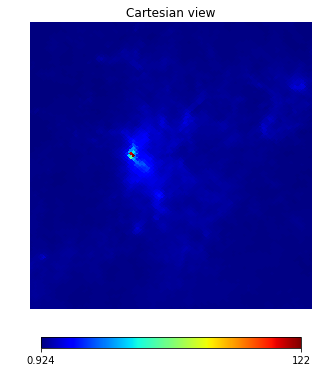

In [95]:
regrid(fmaps[k], 'wssa')

In [98]:
# left do to is the high resolution 408 MHz map and high res halpha map

In [99]:
from astropy.io import fits

In [100]:
xmap = fits.open('../externaldata/new-image.fits')

In [101]:
hdu = xmap[0]

In [102]:
hdu.header

SIMPLE  =                    T / Fits format                                    
BITPIX  =                    8 / bits per pixel                                 
NAXIS   =                    2 / number of axes                                 
NAXIS1  =                 1663 / image width                                    
NAXIS2  =                 1252 / image height                                   
COMMENT Original key: "END"                                                     
COMMENT                                                                         
COMMENT --Start of Astrometry.net WCS solution--                                
COMMENT --Put in by the new-wcs program--                                       
COMMENT                                                                         
WCSAXES =                    2 / no comment                                     
CTYPE1  = 'RA---TAN-SIP' / TAN (gnomic) projection + SIP distortions            
CTYPE2  = 'DEC--TAN-SIP' / T

In [55]:
clon = hdu.header['CRVAL1']
mlon = hdu.header['CRPIX1']
dlon = hdu.header['CDELT1']

In [56]:
#lon x axis

In [57]:
lons = (np.arange(1024) - mlon) * dlon + clon

In [58]:
lons

array([ 111.31499969,  111.30999969,  111.30499969, ...,  106.2100003 ,
        106.20500031,  106.20000031])

In [59]:
clat = hdu.header['CRVAL2']
mlat = hdu.header['CRPIX2']
dlat = hdu.header['CDELT2']

In [99]:
lats = (np.arange(1024) - mlat) * dlat + clat

In [100]:
lats

array([ 0.43500031,  0.44000031,  0.44500031, ...,  5.5399997 ,
        5.54499969,  5.54999969])

In [63]:
lonra

[105.74534025062628, 108.64824459896158]

In [64]:
latra

[3.7224089900461834, 6.6793296655618217]

In [65]:
xmask = (lons > lonra[0]) * (lons < lonra[1])
ymask = (lats > latra[0]) * (lats < latra[1])

In [67]:
cgps = hdu.data[0][0]

In [68]:
cgps.shape

(1024, 1024)

In [76]:
hdu.header['MINCOL']

183

In [77]:
hdu.header['MINROW']

986

In [79]:
hdu.header['DATAMIN']

47.755585

In [96]:
cgps[985, 182]

47.755585

In [81]:
hdu.header['MAXCOL']

143

In [82]:
hdu.header['MAXROW']

852

In [83]:
hdu.header['DATAMAX']

1621.0293

In [97]:
cgps[851, 142]

1621.0293

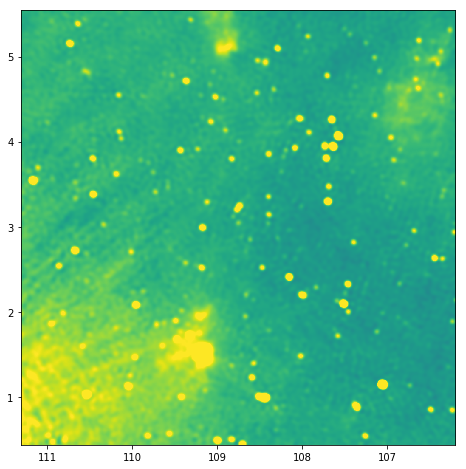

In [110]:
imshow(cgps.T, origin='lower', extent=(lons[0], lons[-1], lats[0], lats[-1]))
clim(0, 100)

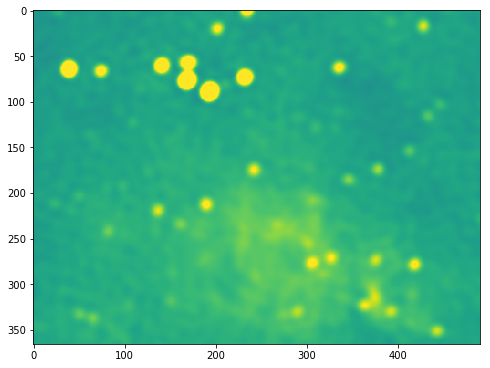

In [74]:
imshow(cgps[ymask, :][:, xmask])
clim(0, 100)

In [ ]:
x=1